This is a simple example of mapping a 2D image to a 3D. The required dependencies are numpy, matplotlib.

In [1]:
# Importing all required dependencies

import numpy as np
from matplotlib import image
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import requests

(400, 261, 4)


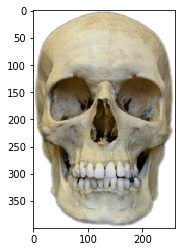

In [2]:
# Overview of the skull used in the example
# I have used matplotlib image to display the image, but PIL also can be used for better resolution.
data=image.imread("https://i.pinimg.com/originals/54/db/8b/54db8b76e13db07c633e6577059d3812.png")
print(data.shape)
pyplot.imshow(data)
pyplot.show()

In [3]:
# Matplotlib used RGBA format to recognize images where A is the tranparency.So I removed this dimension.
dec_data=data[:,:,0]
dec_data.size
MaxD=max(max(dec_data[:,1]),max(dec_data[1,:])) # Maximum value existing in the dataset --> optional


In [4]:
# For mapping the 2D image I will acquire the x and y axes as a function of density mapping and then arrange them sequentially on the z axis
n = np.linspace(0.9,0.1,15); 

d={}
for s_n in range(len(n)):
    x=[];
    y=[];
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if dec_data[i,j]<(n[s_n]*MaxD):
                x.append(j)
                y.append(i)
    z= s_n *np.ones(np.size(x))
    d["x" + str(s_n)]=x
    d["y" + str(s_n)]=y
    d["z" + str(s_n)]=z

In [5]:
%matplotlib notebook
fig = pyplot.figure()
ax = pyplot.axes(projection='3d')

for i in range(len(n)):
    ax.scatter(d["x"+str(i)],d["y"+str(i)],d["z"+str(i)],'o')


<IPython.core.display.Javascript object>